# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *12장 오토인코더와 잠재 표현 학습*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

---

### 12장 미니 프로젝트 A2 잡음제거: 오토인코더 활용

#### 1. 데이터 확인과 준비

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

#### 2. 이미지 읽어 들이기

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 63, 63, 3
images = []

for i in range(40):
   file = url + 'img{0:02d}.jpg'.format(i+1)    # 이미지 파일 이름을 만든다
   img = imread(file)                           # 이미지를 읽는다
   img = resize(img, (imgR,imgC, channel))      # 이미지의 크기를 변경한다
   images.append(img)                           # img에 담는다

<Figure size 432x288 with 0 Axes>

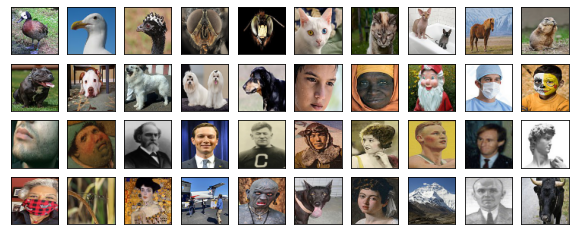

In [ ]:
def plot_images(nRow, nCol, img):
   fig = plt.figure()
   fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
   for i in range(nRow):
       for j in range(nCol):
           if nRow <= 1: axis = ax[j]
           else:         axis = ax[i, j]
           axis.get_xaxis().set_visible(False)
           axis.get_yaxis().set_visible(False)
           axis.imshow(img[i*nCol+j])

plot_images(4, 10, images)

#### 3. 훈련용 데이터와 검증용 데이터 분리

<Figure size 432x288 with 0 Axes>

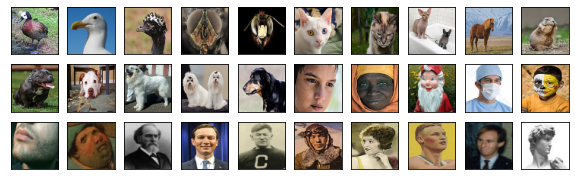

<Figure size 432x288 with 0 Axes>

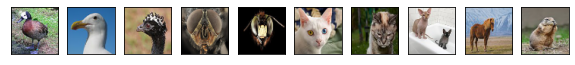

In [ ]:
X = np.array(images[:30])
X_test =np.array(images[30:])
plot_images(3, 10, X)
plot_images(1, 10, X)

#### 4. 입력 데이터 준비

<Figure size 432x288 with 0 Axes>

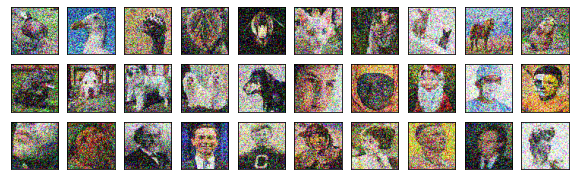

<Figure size 432x288 with 0 Axes>

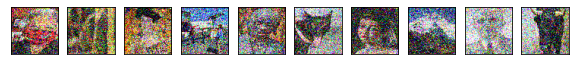

In [ ]:
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.3
X_noisy = np.clip(X_noisy, 0, 1)

X_test_noisy =  X_test \
             +  np.random.randn(len(X_test), imgR, imgC, channel)*0.3
X_test_noisy = np.clip(X_test_noisy, 0, 1)

plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

#### 5. 오토인코더 만들기

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
enc_cnn = models.Sequential([
            layers.Conv2D(filters=16, kernel_size=3, 
                  strides=(3,3), activation='elu', input_shape=(63,63,3)),
            layers.Conv2D(filters=8, kernel_size=3, activation='elu'),
            layers.Flatten(),
            layers.Dense(1024, activation='elu')])
enc_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 16)        448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2888)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2958336   
Total params: 2,959,944
Trainable params: 2,959,944
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
      layers.Dense(2888, input_shape=(1024, ), activation='elu'),
      layers.Reshape(target_shape=(19,19,8)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=3, kernel_size=3, strides=(3,3),
                             activation='elu')])
dec_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2888)              2960200   
_________________________________________________________________
reshape_1 (Reshape)          (None, 19, 19, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 21, 21, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 63, 63, 3)         435       
Total params: 2,961,803
Trainable params: 2,961,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
AE_CNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 1024)              2959944   
_________________________________________________________________
sequential_7 (Sequential)    (None, 63, 63, 3)         2961803   
Total params: 5,921,747
Trainable params: 5,921,747
Non-trainable params: 0
_________________________________________________________________


#### 6. 오토인코더 학습시키기

Epoch 1/100
1/1 [==============================] - 1s 726ms/step - loss: 0.2936
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2935
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3022
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2898
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2497
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2137
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1997
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1843
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1743
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1644
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1592
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1495
Epoch 13/100
1/1 [==============================]

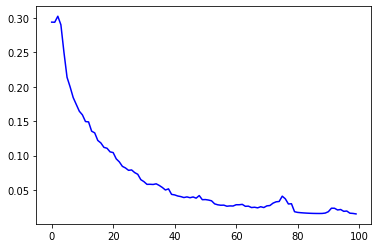

In [ ]:
history = AE_CNN.fit(X_noisy, X, epochs = 100)
plt.plot(history.history['loss'], 'b-')

#### 7. 훈련용 데이터와 테스트 데이터 잡음 제거

<Figure size 432x288 with 0 Axes>

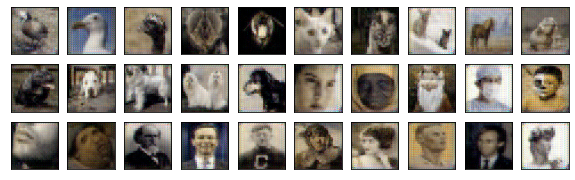

In [ ]:
denoised_result = AE_CNN.predict(X_noisy)
denoised_result = np.clip(denoised_result, 0,1)
plot_images(3, 10, denoised_result)

<Figure size 432x288 with 0 Axes>

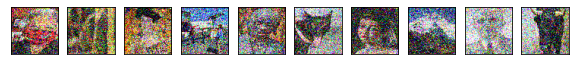

<Figure size 432x288 with 0 Axes>

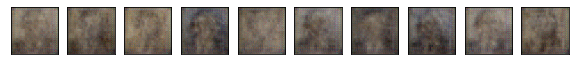

In [ ]:
denoised_result = AE_CNN.predict(X_test_noisy)
denoised_result = np.clip(denoised_result, 0,1)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised_result)

#### 8. 데이터를 증강하여 훈련 효과 높이기

In [ ]:
### Label Augmentation ####
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [ ]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.3


In [ ]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.3

n_augmentation = 400
for _ in range(n_augmentation):
   new_y = it.next()
   new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.3
   y_aug = np.append(y_aug, new_y, axis=0)   
   X_aug = np.append(X_aug, new_X, axis=0)

y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)
print(y_aug.shape)

(12030, 63, 63, 3)


<Figure size 432x288 with 0 Axes>

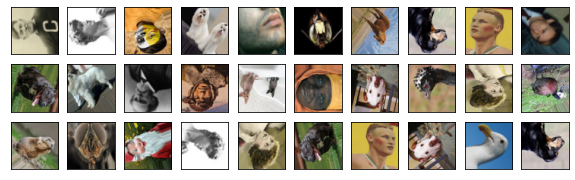

<Figure size 432x288 with 0 Axes>

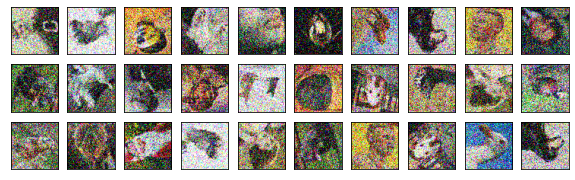

In [ ]:
y_aug = np.clip(y_aug, 0, 1)
X_aug = np.clip(X_aug, 0, 1)
start_idx = 157
plot_images(3, 10, y_aug[start_idx: start_idx+30])
plot_images(3, 10, X_aug[start_idx: start_idx+30])

#### 9. 증강 데이터로 학습하고 잡음 제거 실시

Epoch 1/50
376/376 [==============================] - 3s 8ms/step - loss: 0.0323
Epoch 2/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0168
Epoch 3/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0128
Epoch 4/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0109
Epoch 5/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0098
Epoch 6/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0090
Epoch 7/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0084
Epoch 8/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0080
Epoch 9/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0076
Epoch 10/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0073
Epoch 11/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0071
Epoch 12/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0068
Epoch 13/50
376/376 [====

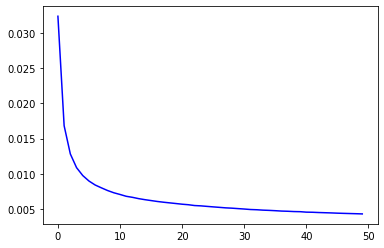

In [ ]:
history = AE_CNN.fit(X_aug, y_aug, epochs = 50)
plt.plot(history.history['loss'], 'b-')


<Figure size 432x288 with 0 Axes>

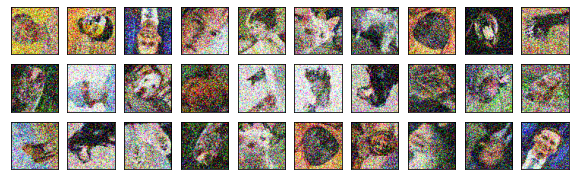

<Figure size 432x288 with 0 Axes>

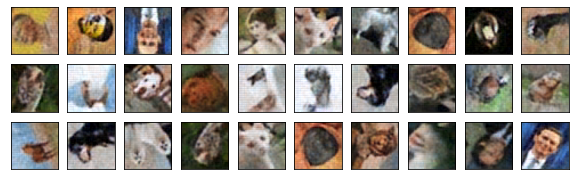

In [ ]:
denoised_result = AE_CNN.predict(X_aug)
denoised_result = np.clip(denoised_result, 0, 1)
plot_images(3, 10, X_aug[100:130])
plot_images(3, 10, denoised_result[100:130])

<Figure size 432x288 with 0 Axes>

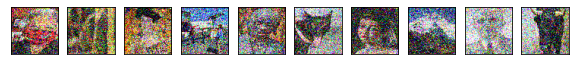

<Figure size 432x288 with 0 Axes>

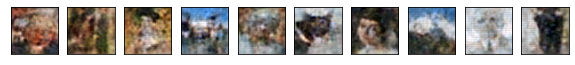

In [ ]:
denoised_result = AE_CNN.predict(X_test_noisy)
denoised_result = np.clip(denoised_result, 0, 1)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised_result)